In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import defaultdict
from distutils.util import strtobool

In [2]:
class HyperGraph():
    def __init__(self):
        self._nodes = set()#{}
        # _hyperedges_attributes: a dictionary mapping a hyperedge ID 
        # to a dictionary of attributes of that hyperedges.
        # Given a hyperedge ID, _hyperedge_attributes[hyperedge_id] stores
        # the nodes of the hyperedge as specified by the user
        self._hyperedges_attributes = {}
        # _node_attributes: a dictionary mapping a node to
        # a dictionary of attributes of that hyperedge ID.
        # Given a node, _hyperedge_attributes[node] stores
        # the set of hypteredge ids that node is included.
        self._node_attributes = defaultdict(list)#{}
        # _current_hyperedge_id: an int representing hyperedge ID 
        # assigned during add_hyperedge function.
        self._current_hyperedge_id = 0
        
    def has_node(self, node):
        return node in self._nodes
    
    def add_nodes(self, nodes:list):
        for node in nodes:
            self._nodes.add(node)
            
    def add_hyperedges_attributes(self, nodes:list):
        self._hyperedges_attributes[self._current_hyperedge_id] = set(nodes)
        
    def add_node_attributes(self, nodes:list):
        for node in nodes:
            self._node_attributes[node].append(self._current_hyperedge_id)
    
    def update_line(self, nodes:list):
        self.add_nodes(nodes)
        self.add_hyperedges_attributes(nodes)
        self.add_node_attributes(nodes)
        self._current_hyperedge_id += 1
        
    def query(self, query_nodes:list):
        node_att_list = []
        for node in query_nodes:
            node_att = self._node_attributes[node]
            node_att_list.append(node_att)
        
        for i, node_att in enumerate(node_att_list):
            if i == 0: common_hyperedges = set(node_att)
            else: common_hyperedges = common_hyperedges & set(node_att)

        if len(common_hyperedges) != 0: 
            return True
        else: 
            return False

In [3]:
filePath = './project_data/paper_author.txt'
lines = open(filePath, 'r').readlines()
lineiter = iter(lines)

line1 = next(lineiter)
numAuth, numPub = list(map(int, line1.strip().split()))

HG = HyperGraph()
for _ in range(numPub):
    linei = next(lineiter)
    Auths = list(map(int, linei.strip().split()))
    HG.update_line(Auths)

In [4]:
print(numPub)
print(numAuth)

137958
58646


## Test Query Public

In [5]:
query_public_filepath = './project_data/query_public.txt'
answer_public_filepath = './project_data/answer_public.txt'

qp_lines = open(query_public_filepath, 'r').readlines()
ap_lines = open(answer_public_filepath, 'r').readlines()
qp_iter = iter(qp_lines)
ap_iter = iter(ap_lines)

num_query = int(next(qp_iter))

correct_query, wrong_query = [], []
wrong_ori_answer = []
for i in range(num_query):
    query = next(qp_iter)
    query = list(map(int, query.strip().split()))
    ans = next(ap_iter).strip()
    ans = strtobool(ans)
    
    pred = HG.query(query)
    if pred == ans:
        correct_query.append(i)
    else:
        if ans == 0: 
            wrong_ori_answer.append(ans)
        wrong_query.append(i)
        
print(f'acc: {len(correct_query)/num_query*100:.2f}')

acc: 53.96


## Number of authors per papers

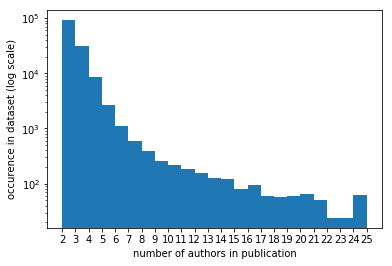

In [6]:
numauth_inpub = []
for value in HG._hyperedges_attributes.values():
    numauth_inpub.append(len(value))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
bins = max(numauth_inpub)-2
res2show = plt.hist(numauth_inpub,log=True, bins=bins)
plt.xlabel('number of authors in publication')
plt.ylabel('occurence in dataset (log scale)')

xticks = np.arange(2,26,1)
ax.set_xticks(xticks)
ax.grid(which='x', alpha=0.5)

plt.show()